In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()
#df.isnull().any() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
X = df[df.columns[0:10]]

In [7]:
y = df['quality']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0) 

In [9]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coeff_df = pd.DataFrame(regressor.coef_, index = X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.182368
volatile acidity,-1.037826
citric acid,0.041427
residual sugar,0.102766
chlorides,-2.229348
free sulfur dioxide,0.001635
total sulfur dioxide,-0.003255
density,-196.846814
pH,0.749746
sulphates,1.271346


In [11]:
y_pred = regressor.predict(X_test)

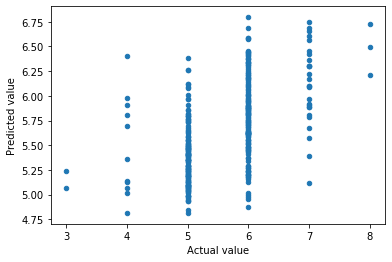

In [16]:
df_output.plot('Actual value','Predicted value',kind='scatter')

In [12]:
df_output = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
df_output.head(20)

,Actual value,Predicted value
1109,6,5.626699
1032,5,5.044625
1002,7,6.606630
487,6,5.266029
979,5,6.264039
1054,6,4.992569
542,5,5.491274
853,6,6.183053
1189,4,5.135285
412,5,4.985393


In [12]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4926752437187648
Mean Squared Error: 0.4169870203480858
Root Mean Squared Error: 0.6457453215843579


In [13]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.3246007746811589
0.27158869185185963


We can see that the value of R2 is really low for both train set and test set. We can say that the model is under fitted.

### Mean absolute error: 
This is the average of absolute errors of all the data points in the given dataset.
### Mean squared error: 
This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
### Root Mean Squared Error: 
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

You can see that the value of root mean squared error is 0.62.This means that our algorithm was not very accurate but can still make reasonably good predictions.

### If the model was overfitted. We can try ridge regression (L2 regularization) to see the model performance.

# Ridge regression (L2 regularization)

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train) # we can also put alpha value as l2 regularization parameter to change the l2 penalty (lemda*m^2)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.24576485107154056
0.21819715968300604


Increasing the alpha value forces coefficients and decreases training set performance. However it may help to generalization.Decreasing the alpha allows the coefficients to be less restricted.

# Lasso(L1 regularization)

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training: {}'.format(lasso.score(X_train,y_train)))
print('Testing: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training: 0.032455862776013866
Testing: 0.029040902458977613
Number of features used: 1


In [26]:
corr = df.corr()

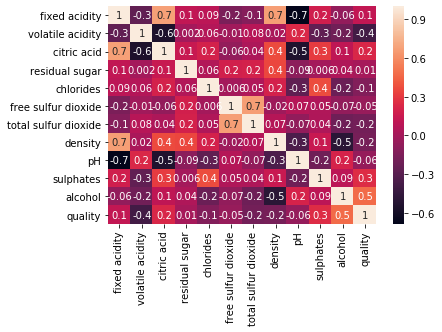

In [34]:

sns.heatmap(corr, annot= True,fmt='.1g')

In [37]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
#A lower alpha allowed us to fit a more complex model, which worked better on the training and test data

la = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(la.score(X_train, y_train)))
print("Test set score: {:.2f}".format(la.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(la.coef_ != 0)))


Training set score: 0.20
Test set score: 0.19
Number of features used: 6


### Robust regression

In [60]:
# Add outlier data
n_outliers = 10
np.random.seed(0)
X[:n_outliers] = np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = np.random.normal(size=n_outliers) + 10

C:\Users\ashek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ashek\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\ashek\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [66]:
from sklearn.linear_model import LinearRegression,RANSACRegressor
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size = 0.2, random_state = 0) 
lr = LinearRegression()
lr.fit(X_train2,y_train2)
ransac = RANSACRegressor()
ransac.fit(X_train2,y_train2)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [67]:
ransac_pred = ransac.predict(X_test2)
lr_pred = lr.predict(X_test2)

In [68]:
print('Mean Absolute Error:', mean_absolute_error(y_test2, ransac_pred))  
print('Mean Squared Error:', mean_squared_error(y_test2, ransac_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, ransac_pred)))

Mean Absolute Error: 3.705778906214222
Mean Squared Error: 1041.8369245897436
Root Mean Squared Error: 32.277498735028146


In [69]:
print('Mean Absolute Error:', mean_absolute_error(y_test2, lr_pred))  
print('Mean Squared Error:', mean_squared_error(y_test2, lr_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, lr_pred)))

Mean Absolute Error: 0.5523813529057735
Mean Squared Error: 0.5210716024278534
Root Mean Squared Error: 0.721852895282587


In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles

#X,y = make_circles(n_samples=1000, noise=.04)
#plt.scatter(X[:,0],X[:,1],c=y,s=10)

pol = PolynomialFeatures(degree=2)

X_tf = pol.fit_transform(X)
lr = LogisticRegression()

trainX,testX,trainY,testY = train_test_split(X_tf,y)
lr.fit(trainX,trainY)

lr.score(testX,testY)


C:\Users\ashek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.51

In [81]:
lr.coef_

array([[-1.09970016e-01, -2.16729920e-01, -3.58637475e-03,
         1.00307651e-02,  8.04561243e-02,  4.73860156e-02,
         8.43922523e-02, -4.05903526e-01, -1.04760808e-01,
        -2.79384414e-01,  2.04792996e-03, -7.13557696e-02,
         2.75501091e-01,  6.35751203e-01, -4.14721764e-01,
         6.36474916e-01, -6.71946907e-02,  6.17029113e-02,
        -1.76142496e-01,  3.73547776e-01,  1.04620482e-01,
        -3.01002719e-02, -2.81485592e-02,  8.96447312e-01,
         3.21993836e-02,  1.01787260e+00, -2.20302734e-01,
         1.14030290e-04,  7.21846034e-02,  9.51128405e-02,
         9.23723878e-02, -2.50051782e-01,  2.68762003e-02,
        -9.55088497e-01,  2.69835681e-01,  1.18287333e-02,
         4.72877299e-02, -2.34202163e-02,  1.22835255e-01,
         9.83163964e-02, -4.64714019e-01,  8.11868972e-02,
         8.91743214e-02,  7.62579917e-01,  1.08410118e-01,
         1.75187375e-02,  2.88282529e-01,  1.20607766e-01,
         4.77722083e-02,  1.50143202e-01,  2.68444778e-0